# Exploratory analysis

## Import and combine S&P 500 data sets

In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# LOAD DATA SETS 

# S&P 500 daily closing value 1986 - 2018
sp_old_raw = pd.read_csv('./data/sp500_to_29jun2018.csv')

# S&P 500 daily closing value
sp_new_raw_temp1 = pd.read_csv('./data/sp500_to_9apr2020.csv')
sp_new_raw_temp2 = sp_new_raw_temp1[['Effective date ', 'S&P 500']]
sp_new_raw = sp_new_raw_temp2[sp_new_raw_temp2['Effective date '].notna()]

In [3]:
# recast date as datetime
sp_old = pd.DataFrame({'date': pd.to_datetime(sp_old_raw['date']),
                       'close': sp_old_raw['close']})

sp_new = pd.DataFrame({'date': pd.to_datetime(sp_new_raw['Effective date ']),
                       'close': sp_new_raw['S&P 500']})

In [4]:
sp = pd.concat([sp_old, sp_new])
sp.to_csv('./data/sp500_all.csv', index=False)

## Load combined S&P 500 data set

In [5]:
# # LOAD DATA SETS 

# # S&P 500 daily closing value Jan 1986 - Apr 2020
# sp = pd.read_csv('./data/sp500_all.csv')
sp[::1000]

,date,close
0,1986-01-02,209.59
1000,1989-12-14,350.93
2000,1993-11-29,461.90
3000,1997-11-11,923.78
4000,2001-11-05,1102.84
5000,2005-10-25,1196.54
6000,2009-10-15,1096.56
7000,2013-10-07,1676.12
8000,2017-09-26,2496.84


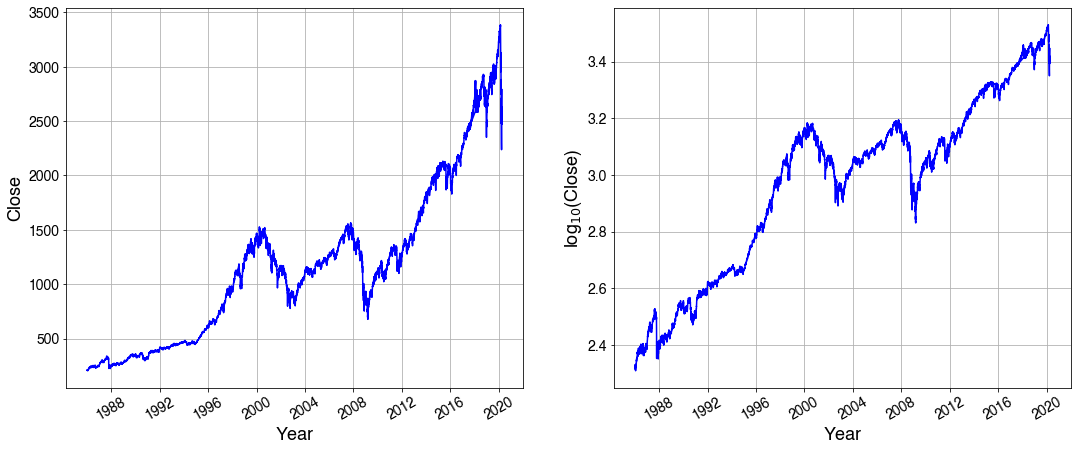

In [20]:
### PLOT PRICES

# linear scale
fig, axes = plt.subplots(1, 2, figsize = (18,7))
x = sp['date']
y = sp['close']
axes[0].plot(x, y, 'blue')
axes[0].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# log scale
x = sp['date']
y = np.log10(sp['close'])
axes[1].plot(x, y, 'blue')
axes[1].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel(r'log$_{\rm 10}$(Close)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_yticklabels(), fontsize=14, fontname = 'Helvetica')

# turn grid on
axes[0].grid()
axes[1].grid()

figure_name = './images/sp_lin_log.png'

plt.savefig(figure_name, dpi = 250)

plt.show()

In [7]:
sp_diffs = pd.DataFrame({'date': sp['date'],
                         'close': sp['close'],
                         'change': sp.diff()['close'],
                         'change pct': round(100*sp.diff()['close']/sp['close'],3)})

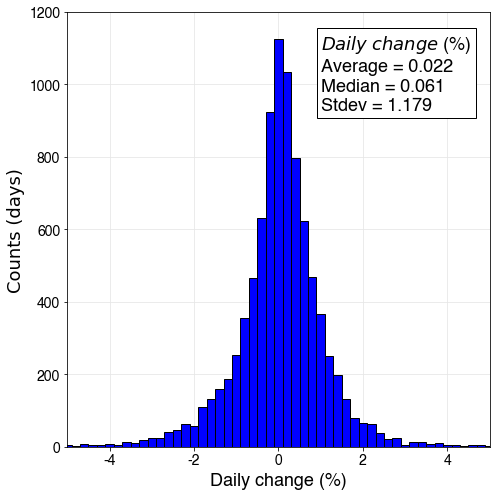

In [21]:
### PLOT HISTOGRAM OF DAILY CHANGES ###

# create textbox
data = sp_diffs['change pct'][1:]
average = np.nanmean(data)
median = np.nanmedian(data)
stdev = np.std(data)
props = dict(facecolor='white', edgecolor='none', alpha=0.67)
textbox = '$Daily$ $change$ (%%) \nAverage = %s \nMedian = %s \nStdev = %s' % (round(average,3), 
                                                                               round(median,3), 
                                                                               round(stdev,3))


from plotfunctions_1 import plot_hist
binwidth = 0.2
xmin = -5; xmax = 5
ymin = 0; ymax = 1200
xlabel = 'Daily change (%)'; ylabel = 'Counts (days)'
figure_name = './images/daily_changes.png'
plot_hist(data, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, figure_name)

In [22]:
# look at largest changes in either direction
sp_diffs

,date,close,change,change pct
0,1986-01-02,209.59,NaN,NaN
1,1986-01-03,210.88,1.29,0.612
2,1986-01-06,210.65,-0.23,-0.109
3,1986-01-07,213.80,3.15,1.473
4,1986-01-08,207.97,-5.83,-2.803
...,...,...,...,...
751,2020-04-03,2488.65,-38.25,-1.537
752,2020-04-06,2663.68,175.03,6.571
753,2020-04-07,2659.41,-4.27,-0.161
754,2020-04-08,2749.98,90.57,3.293


# Placeholder


In [10]:
# top_ten_2 = top_ten_2[top_ten_2['Make'] != 'Chrysler']

In [11]:
# round numerical data for readability 
top_ten_2['New price ($)'] = round(top_ten_2['New price ($)'], -2)
top_ten_2['Fit quality, R2'] = round(top_ten_2['Fit quality, R2'],3)
top_ten_2['Decay coeff. (1/y)'] = round(top_ten_2['Decay coeff. (1/y)'],3)
top_ten_2['Half life (y)'] = round(top_ten_2['Half life (y)'],2)
top_ten_2.style.hide_index()

NameError: name 'top_ten_2' is not defined

In [ ]:
# get bottom ten models by half life
bot_ten = depr_summary.sort_values('Half life', ascending=True)[:10]

# get select columns and rename them 
bot_ten_1 = bot_ten[['Make', 'Model', 'Fit_age_a', 'Fit_age_b', 'Fit_age_R2', 'Half life']]
bot_ten_2 = bot_ten_1.rename(columns={'Fit_age_a': 'New price ($)',
                             'Fit_age_b': 'Decay coeff. (1/y)',
                             'Fit_age_R2': 'Fit quality, R2',
                             'Half life': 'Half life (y)'})

In [ ]:
# round numerical data for readability 
bot_ten_2['New price ($)'] = round(bot_ten_2['New price ($)'], -2)
bot_ten_2['Fit quality, R2'] = round(bot_ten_2['Fit quality, R2'],3)
bot_ten_2['Decay coeff. (1/y)'] = round(bot_ten_2['Decay coeff. (1/y)'],3)
bot_ten_2['Half life (y)'] = round(bot_ten_2['Half life (y)'],2)
bot_ten_2.style.hide_index()

In [ ]:
# join full depreciation data with model counts, save .csv
model_counts_2 = model_counts.groupby('Model').sum()
full_data_set = depr_summary_all.drop(columns=['Body']).merge(model_counts_2, how='inner', on='Model').drop(columns=['index'])
# len(full_data_set)
# depr_summary_all[:25]
full_data_set_clean = full_data_set.rename(columns={"Fit_age_a": "New Price", 
                                                    "Fit_age_b": "Decay Coeff",
                                                    "Fit_age_R2": "Fit R2",
                                                    "Half life": "Half-life",
                                                    "Count": "Listings"})
full_data_set_clean_2 = full_data_set_clean.round({'Decay Coeff': 3,
                                                   'Fit R2': 3, 
                                                   'Half-life': 2})
full_data_set_clean_2['New Price'] = full_data_set_clean_2['New Price'].astype(int)
full_data_set_clean_3 = full_data_set_clean_2.sort_values(by=['Make', 'Model'])

full_data_set_clean_3.to_csv('../data/full_data.csv', index=False)

In [ ]:
# pull in empirical data and data predicted from models
pred_data = pd.read_csv('../data/depreciation/pred_data_2.csv').drop(columns=['Age'])
emp_data = pd.read_csv('../data/depreciation/emp_data_2.csv').drop(columns=['Age'])

In [ ]:
diffs = emp_data - pred_data
n_models = 150
n_years = 25
diffs_selected = diffs.iloc[:n_years,:n_models]
diffs_selected_norm = diffs_selected/emp_data.iloc[0,:n_models]
diffs_selected_norm_avg = diffs_selected_norm.mean(axis=1)
diffs_selected_norm_25 = diffs_selected_norm.quantile(.25,axis=1)
diffs_selected_norm_75 = diffs_selected_norm.quantile(.75,axis=1)

In [ ]:
# plot data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(14,7))
ax.plot(diffs_selected_norm.iloc[:,0], color='gray', linewidth=2, alpha=0.15, label='Common cars')
ax.plot(diffs_selected_norm.iloc[:,1:], color='gray', linewidth=2, alpha=0.15, label='_nolegend_')

# plot average and quantiles
ax.plot(diffs_selected_norm_avg, color='red', linewidth=4, linestyle='-', label='Average')
ax.plot(diffs_selected_norm_25, color='red', linewidth=2, linestyle=':')
ax.plot(diffs_selected_norm_75, color='red', linewidth=2, linestyle=':')

plt.xlabel('Car age (years)', fontsize = 22, fontname = 'Helvetica')

# Plot Median list price - predicted price) / median new car price
plt.ylabel('Residual (norm.)', fontsize = 22, fontname = 'Helvetica')
# plt.title('Model ', fontsize = 20, fontname = 'Helvetica')
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)
plt.axhline(linewidth=1, color='gray', linestyle='--', zorder = 0)
plt.xlim(0,20)
plt.ylim(-0.11, 0.11)
plt.legend(fontsize=18, loc='lower right')
plt.xticks(range(0,21,5))
plt.yticks([-0.10, -0.05, 0, 0.05, 0.10])
# plt.savefig('../images/Prediction_error.png', dpi = 150)
plt.show()

In [ ]:
# get number of years for each car
listings_all = pd.read_csv('../data/listings5.csv')
model_year_counts = listings_all.groupby('Model').Year.nunique().to_frame()
# model_year_counts

In [ ]:
# join year counts with depreciation summary
depr_model_year_counts_temp = depr_summary.merge(model_year_counts, on='Model')
depr_model_year_counts = depr_model_year_counts_temp[['Make', 'Model', 'Year', 'Half life']]
# depr_model_year_counts.sort_values('Year')[130:170].sort_values('Half life')
depr_model_year_counts.to_csv('../data/depr_model_year_counts.csv')

In [ ]:
# plot half life versus time in production
fig, ax = plt.subplots(1, 1, figsize=(6,6))

x = depr_model_year_counts['Year']
y = depr_model_year_counts['Half life']

ax.scatter(x, y, edgecolor='black', facecolor='blue', alpha=0.6)

import numpy as np
fit = np.polyfit(x, y, 1, full=True)
# print(fit)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept, r_value, p_value, std_err)

ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), '#ff4c00', linewidth=3)

# set up text box
props_1 = dict(facecolor='white', edgecolor='none', alpha=0.67)

textbox_1 = r'$t_{1/2}(t) = a + bt$'
textbox_2 = '$a$ = %5.2f \n$b$ = %0.3f' % (intercept, slope) + '\n' + r'$\rho$ = %5.2f' % r_value

ax.text(0.05, 0.95, textbox_1, transform = ax.transAxes, fontsize = 16, 
        fontname = 'Helvetica', verticalalignment = 'top', bbox = props_1)

ax.text(0.05, 0.85, textbox_2, transform = ax.transAxes, fontsize = 16, 
        fontname = 'Helvetica', verticalalignment = 'top', bbox = props_1)

xlabel = r'Time in production ($\it{t}$, years)'
ylabel = r'Half-life ($\it{t}_{1/2}$, years)' 

plt.xlabel(xlabel, fontsize = 18, fontname = 'Helvetica')
plt.ylabel(ylabel, fontsize = 18)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)

plt.savefig('../images/Time_in_production.png', dpi = 300)

plt.show()

In [ ]:
price_depr = depr_summary[['Make', 'Model', 'Fit_age_a', 'Half life']]
price_depr

In [ ]:
# plot depreciation vs new price
fig, ax = plt.subplots(1, 1, figsize=(6,6))

x = price_depr['Fit_age_a']
y = price_depr['Half life']

ax.scatter(x, y, edgecolor='black', facecolor='blue', alpha=0.6)
# ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), '#ff4c00', linewidth=3)

plt.xlim(0,125000)

xlabel = r'Price ($\it{P}$, \$k)' 
ylabel = r'Half-life ($\it{t}_{1/2}$, years)' 
xscale = 1000

plt.xlabel(xlabel, fontsize = 18, fontname = 'Helvetica')
plt.ylabel(ylabel, fontsize = 18)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)

ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/xscale))
ax.xaxis.set_major_formatter(ticks)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept, r_value, p_value, std_err)